In [1]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random as rd
from copy import deepcopy
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns


In [2]:
df= pd.read_csv("Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Genre,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# keeping only the desired column
col = ['Genre', 'Age', 'AnnualIncome', 'SpendingScore']
customer_features = df[col]

In [5]:
customer_features.head()

,Genre,Age,AnnualIncome,SpendingScore
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [6]:
customer_features = pd.get_dummies(customer_features, 
                                     columns= ['Genre'])

In [7]:
customer_features['cluster']=0

In [8]:
customer_features

,Age,AnnualIncome,SpendingScore,Genre_Female,Genre_Male,cluster
0,19,15,39,0,1,0
1,21,15,81,0,1,0
2,20,16,6,1,0,0
3,23,16,77,1,0,0
4,31,17,40,1,0,0
...,...,...,...,...,...,...
195,35,120,79,1,0,0
196,45,126,28,1,0,0
197,32,126,74,0,1,0
198,32,137,18,0,1,0


In [9]:
mean = np.mean(customer_features, axis=0)

In [10]:
data=customer_features
X = data.values

In [11]:
X

array([[ 19,  15,  39,   0,   1,   0],
       [ 21,  15,  81,   0,   1,   0],
       [ 20,  16,   6,   1,   0,   0],
       ...,
       [ 32, 126,  74,   0,   1,   0],
       [ 32, 137,  18,   0,   1,   0],
       [ 30, 137,  83,   0,   1,   0]], dtype=int64)

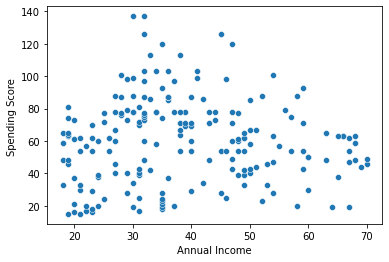

In [12]:
sns.scatterplot(X[:,0], X[:, 1])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score ')
plt.show()

In [13]:
def kmeans(X, k):
    diff = 1
    #making a cluster array of zeros of size of number of datapoints
    cluster = np.zeros(X.shape[0])
    #this gets random values for each column k times
    centroids = data.sample(n=k).values
    while diff:
        for i, row in enumerate(X):
            #minimum distance set at positive infinity
            mn_dist = float('inf')
            #this loop goes over each of the centroid
            for idx, centroid in enumerate(centroids):
                #calculating eucludiean distance between a centeroid point and datapoint
                d = np.sqrt((centroid[0]-row[0])**2 + (centroid[1]-row[1])**2)
                #this condition works if euclidean distance of datapoint(d1) and centeroid(c2) is less than mn_dist than 
                #earlier centroid(c1) datapoint is assigned the respective centroid 
                if mn_dist > d:
                    mn_dist = d
                    cluster[i] = idx
        #after placing points in respective centeroids the new_centroid values calculated by taking mean
        new_centroids = pd.DataFrame(X).groupby(by=cluster).mean().values
        #closing condition 
        if np.count_nonzero(centroids-new_centroids) == 0:
            print(new_centroids)
            diff = 0
        else:
            centroids = new_centroids
    return centroids, cluster

In [15]:
k=5
centroids = data.sample(n=k).values
print(centroids)

[[49 33 14  1  0  0]
 [32 87 63  0  1  0]
 [38 67 40  1  0  0]
 [66 63 48  0  1  0]
 [31 72 71  1  0  0]]


In [16]:
k = 5
centroids, cluster = kmeans(X, k)

[[ 25.73529412  52.41176471  52.94117647   0.61764706   0.38235294
    0.        ]
 [ 35.89830508  77.3559322   51.           0.50847458   0.49152542
    0.        ]
 [ 37.54545455 108.18181818  52.           0.59090909   0.40909091
    0.        ]
 [ 56.38461538  50.13461538  43.15384615   0.51923077   0.48076923
    0.        ]
 [ 30.87878788  23.60606061  55.84848485   0.63636364   0.36363636
    0.        ]]


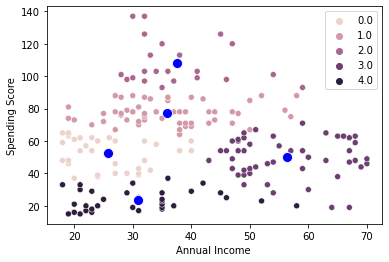

In [17]:
sns.scatterplot(X[:,0], X[:, 1],hue=cluster)
sns.scatterplot(centroids[:,0], centroids[:, 1], s=100, color='blue')
plt.xlabel('Annual Income ')
plt.ylabel('Spending Score')
plt.show()